In [1]:
import sys
sys.path.append("..")
from IPython.display import display

In [2]:
import numpy as np
import logging
import pickle
import time
import importlib 
import copy
import os

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)

import matplotlib as mpl
from matplotlib import rcParams
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from matplotlib import ticker
from matplotlib import colors
from matplotlib.patches import Ellipse
from matplotlib import gridspec



In [4]:
from scripts import reclusterTree_invM as reclusterTree
from scripts import linkageList
from scripts import heatClustermap
# from scripts import Tree1D_invM as Tree1D
from scripts import likelihood_invM as likelihood
# from scripts import beamsearchTJS
from scripts import N2Greedy_invM as N2Greedy
# from scripts import beamSearch as bs
from scripts import beamSearchOptimal_invM  as BSO
from scripts import jetClustering_invM as jetClustering
from scripts.utils import get_logger
from scripts import auxFunctions_invM as auxFunctions 

In [5]:
logger = get_logger(level=logging.INFO)

In [6]:
plotDir ="../hierarchical-trellis/src/plots/"

In [7]:
"""Reload filles after changes"""
importlib.reload(reclusterTree)
importlib.reload(linkageList)
importlib.reload(heatClustermap)
# importlib.reload(Tree1D)
importlib.reload(likelihood)
importlib.reload(N2Greedy)
# importlib.reload(bs)
importlib.reload(BSO)
importlib.reload(jetClustering)
importlib.reload(auxFunctions)

<module 'scripts.auxFunctions_invM' from '/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/TreeAlgorithms/scripts/auxFunctions_invM.py'>

# CLUSTERING ALGORITHMS TESTED ON JETS GENERATED WITH THE TOY GENERATIVE MODEL 

## ANALYSIS

Load truth and reclustered jets 

Format: ["QCDjets", "Wjets"]
All the lists will have "QCDjet" quantities on the 1st entry and "Wjet" ones on the 2nd entry.

In [8]:
# jetLabels = ["Wjets","TrellisMw300","TrellisMw01"]
# jetLabels = ["TrellisMw300","TrellisMw01","TrellisMw01B"]
jetLabels = ["Trellis"]
truthDict = {}
GreedyDict ={}
BSODict = {}

In [9]:
Nstart = 0
Nend = 50
N_jets = 100

In [10]:
jetType="Trellis"
truthDict[jetType]  = jetClustering.appendTruthJets(Nstart, Nend, N_jets, truth = True, jetType = jetType)
GreedyDict[jetType]  = jetClustering.appendJets(Nstart, Nend, N_jets, BS = False, Greedy = True, jetType = jetType)
BSODict[jetType]  = jetClustering.appendJets(Nstart, Nend, N_jets, BS = True, Greedy = False, jetType = jetType)

2020-03-09 14:37:15,622:INFO:: TOTAL TIME = 3.5912070274353027


In [11]:
len(GreedyDict["Trellis"]["jetsList"][0][0]["logLH"])

17

In [12]:
GreedyDict["Trellis"]["jetsList"][0][18]["logLH"]

array([-14.79826766,  -6.49948157,   0.        ,   0.        ,
       -11.26765825,  -3.03083084,   0.        ,   0.        ,
        -3.53844259,   0.        ,   0.        ])

In [13]:
len(GreedyDict["Trellis"]["jetsList"])

50

In [14]:
lhTuples = [(i,np.sum(GreedyDict["Trellis"]["jetsList"][1][i]["logLH"])) for i in range(len(GreedyDict["Trellis"]["jetsList"][1]))]

In [15]:
[sorted(lhTuples, key=lambda x: x[1]) for i in range(len(lhTuples))]

[[(79, -87.04047549620907),
  (59, -72.6767119699114),
  (38, -68.61256683268847),
  (77, -67.58641869816113),
  (20, -67.5697506485395),
  (85, -64.1157453844698),
  (61, -63.36138671463598),
  (12, -63.06550157192079),
  (37, -61.6027467570993),
  (81, -61.57711514103743),
  (35, -61.34284497485824),
  (91, -61.27473254310575),
  (68, -60.92371271154022),
  (74, -60.90303542971524),
  (34, -60.805745805981665),
  (0, -60.60331053508296),
  (25, -59.8734058583124),
  (48, -59.44825578684151),
  (70, -59.18598087632964),
  (45, -57.04899173470071),
  (41, -56.469589986246945),
  (71, -56.43867699533048),
  (86, -56.43548934172357),
  (9, -56.00465259134459),
  (30, -55.623523034831805),
  (66, -54.86584471346605),
  (58, -54.79951236512158),
  (2, -54.77095986644593),
  (31, -54.62249588979611),
  (44, -53.85441740887139),
  (76, -53.09342986210993),
  (4, -52.929887376066205),
  (83, -52.32163174382207),
  (55, -51.14660042570585),
  (63, -51.003695605081404),
  (75, -50.8912582816960

In [16]:
len(GreedyDict["Trellis"])

1

In [17]:
truth_dic2 = {}
Greedy_dic2 = {}
BSO_dic2 = {}


In [18]:
for label in jetLabels:
    truth_dic2[label], Greedy_dic2[label],  BSO_dic2[label], NGreedyFail, NBSFail =  jetClustering.logLHCut(truthDict["Trellis"], GreedyDict["Trellis"] , BSODict["Trellis"] )

In [19]:
NGreedyFail, NBSFail

(0, 0)

In [20]:
len(Greedy_dic2["Trellis"]["jetsList"])

50

In [21]:
truth_dic = {}
Greedy_dic = {}
BSO_dic = {}

In [22]:
importlib.reload(auxFunctions)

<module 'scripts.auxFunctions_invM' from '/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/TreeAlgorithms/scripts/auxFunctions_invM.py'>

In [23]:
jetsperSet = 100
for label in jetLabels:
    truth_dic[label] =auxFunctions.jetsLogLH(Nstart,Nend, truth_dic2[label],jetsperSet ,rerunLH=False)
    Greedy_dic[label]  =auxFunctions.jetsLogLH(Nstart,Nend, Greedy_dic2[label] ,jetsperSet ,rerunLH=False)
    BSO_dic[label]  =auxFunctions.jetsLogLH(Nstart,Nend, BSO_dic2[label], jetsperSet  ,rerunLH=False)

len(Dic[jetsList]) =  50
len(Dic[jetsList]) =  50
len(Dic[jetsList]) =  50


In [30]:
len(Greedy_dic["Trellis"]["jetsListLogLH"])

5000

In [31]:
for label in jetLabels:
    print(label)
    print(" Truth mean logLH =  %0.1f $\pm$ %0.1f" %(np.average(truth_dic[label]["avgLogLH"]),  truth_dic[label]["sigma"]))
    print(" Greedy mean logLH = %0.1f $\pm$ %0.1f" %(np.average(Greedy_dic[label]["avgLogLH"]),  Greedy_dic[label]["sigma"]))
    print(" Beam Search mean logLH = %0.1f $\pm$ %0.1f" %(np.average(BSO_dic[label]["avgLogLH"]),  BSO_dic[label]["sigma"]))
    print("---"*5)

Trellis
 Truth mean logLH =  -48.0 $\pm$ 1.4
 Greedy mean logLH = -46.2 $\pm$ 1.4
 Beam Search mean logLH = -45.2 $\pm$ 1.3
---------------


In [24]:
save=True
outdir = "../hierarchical-trellis/src/data/invMassGinkgo/"
if save:
    for label in jetLabels:
        out_filename = os.path.join(outdir, "TruthBSGreedy_"+label+".pkl")
        with open(out_filename, "wb") as f:
            pickle.dump(( truth_dic[label]["jetsList"], BSO_dic[label]["jetsList"],Greedy_dic[label]["jetsList"]), f, protocol=2)

In [11]:
len(np.asarray(GreedyDict["Trellis"]["jetsList"]).flatten())

5000

In [15]:
# with open(dicsDir + "jetDicts"+str(N_jets) + "Mw.pkl", "rb") as fd:
#     truthDict, GreedyDict,BSODict = pickle.load(fd, encoding='latin-1')

In [55]:
computeDijAngles = False
if computeDijAngles:
    truthDict = auxFunctions.scanJets(truthDict, dijmetrics=False,  angles=True)
    GreedyDict = auxFunctions.scanJets(GreedyDict, dijmetrics=False,  angles=True)
    BSODict = auxFunctions.scanJets(BSODict, dijmetrics=False,  angles=True)

In [12]:
for jetType in jetLabels:
    truthDict[jetType]["Nconst"] = [len(jet["leaves"]) for jet in np.asarray(truthDict[jetType]["jetsList"]).flatten()]

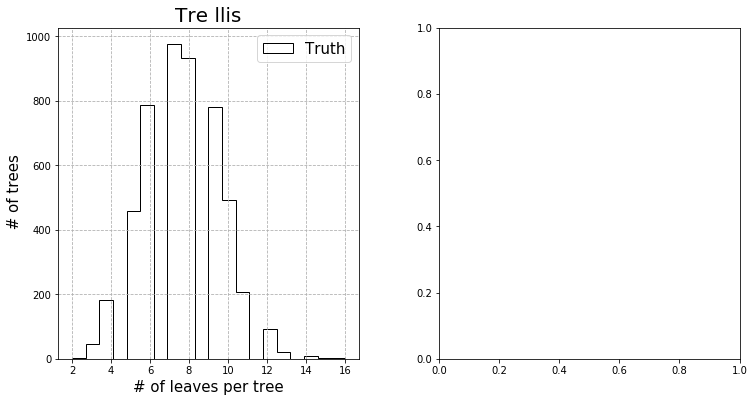

In [13]:

""" Number of constituents"""
auxFunctions.algoHist(truthDict, jetLabels = jetLabels,bins = 20,  fixedJetP = False, xLabel = "# of leaves per tree", yLabel = " # of trees", variable = "Nconst")

Log LH values before cut on Delta root 

In [14]:
for label in jetLabels:
    print(label)
    print(" Truth mean logLH =  %0.1f $\pm$ %0.1f" %(np.average(truthDict[label]["avgLogLH"]),  truthDict[label]["sigma"]))
    print(" Greedy mean logLH = %0.1f $\pm$ %0.1f" %(np.average(GreedyDict[label]["avgLogLH"]),  GreedyDict[label]["sigma"]))
    print(" Beam Search mean logLH = %0.1f $\pm$ %0.1f" %(np.average(BSODict[label]["avgLogLH"]),  BSODict[label]["sigma"]))
    print("---"*5)

Trellis
 Truth mean logLH =  -48.0 $\pm$ 0.0
 Greedy mean logLH = -inf $\pm$ nan
 Beam Search mean logLH = -inf $\pm$ nan
---------------


### Cluster trellis dataset

In [15]:
truth_dic = {}
Greedy_dic = {}
BSO_dic = {}
Width = np.inf

In [16]:
jetLabels

['Trellis']

In [17]:
for label in jetLabels:
    truth_dic[label], Greedy_dic[label], BSO_dic[label], NGreedyFail, NBSFail = auxFunctions.deltaRootCut(
        Nstart,
        Nend, 
        truthDict[label], 
        GreedyDict[label],
        BSODict[label], 
        Width = Width,
        M_Hard = truthDict[label]["jetsList"][0][0]["M_Hard"] ,
        NleavesMin=2, 
        NleavesMax= 20)

In [18]:
NGreedyFail, NBSFail 

(543, 630)

In [19]:
len(truth_dic["Trellis"]["jetsList"][0])

89

In [20]:
len(np.asarray(truth_dic["Trellis"]["jetsList"]).flatten())

50

In [21]:
importlib.reload(auxFunctions)

<module 'scripts.auxFunctions_invM' from '/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/TreeAlgorithms/scripts/auxFunctions_invM.py'>

In [22]:
jetsperSet = 100
for label in jetLabels:
    truth_dic[label] =auxFunctions.jetsLogLH(Nstart,Nend, truth_dic[label],jetsperSet ,rerunLH=True)
    Greedy_dic[label]  =auxFunctions.jetsLogLH(Nstart,Nend, Greedy_dic[label] ,jetsperSet ,rerunLH=True)
    BSO_dic[label]  =auxFunctions.jetsLogLH(Nstart,Nend, BSO_dic[label], jetsperSet  ,rerunLH=True)

len(Dic[jetsList]) =  50


/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/sebastianmacaluso/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


len(Dic[jetsList]) =  50
len(Dic[jetsList]) =  50


In [20]:
jetLabels

['Trellis']

In [21]:
# for label in jetLabels:
len(truth_dic["Trellis"]["jetsList"])

4095

In [23]:
save=False
outdir = "../hierarchical-trellis/src/data/invMassGinkgo/"
if save:
    for label in jetLabels:
        out_filename = os.path.join(outdir, "TruthBSGreedy_"+label+".pkl")
        with open(out_filename, "wb") as f:
            pickle.dump(( truth_dic[label]["jetsList"], BSO_dic[label]["jetsList"],Greedy_dic[label]["jetsList"]), f, protocol=2)